# Figure 5A

In [10]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import NMF, PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from qian_et_al_2023.src import base

In [11]:
ss = StandardScaler()
mms = MinMaxScaler()

In [32]:
pca = pd.read_csv(base.DATA_PATH / 'fig5_emb_pca.csv', index_col=0)
nmf = pd.read_csv(base.DATA_PATH / 'fig5_labels_nmf.csv', index_col=0)
gslf_index = pd.read_csv(base.DATA_PATH / 'fig5_gslf_indices.csv').values.ravel()

In [33]:
z1 = pd.DataFrame(ss.fit_transform(pca.values))
z2 = nmf.rank()
z2[:] = mms.fit_transform(z2).clip(0, 1)

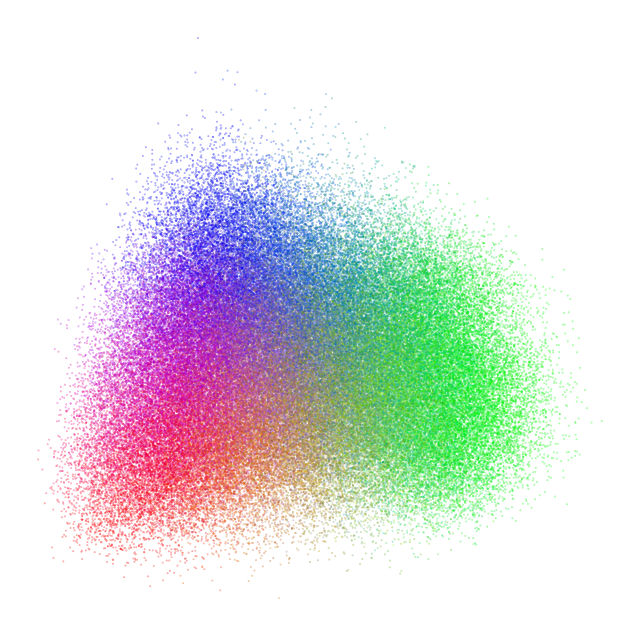

In [35]:
plt.figure(figsize=(8, 8))
ax = plt.gca()
z1.plot.scatter(x=0, y=1, c=z2.values, alpha=0.5, s=0.1, ax=ax)
ax.set_axis_off()

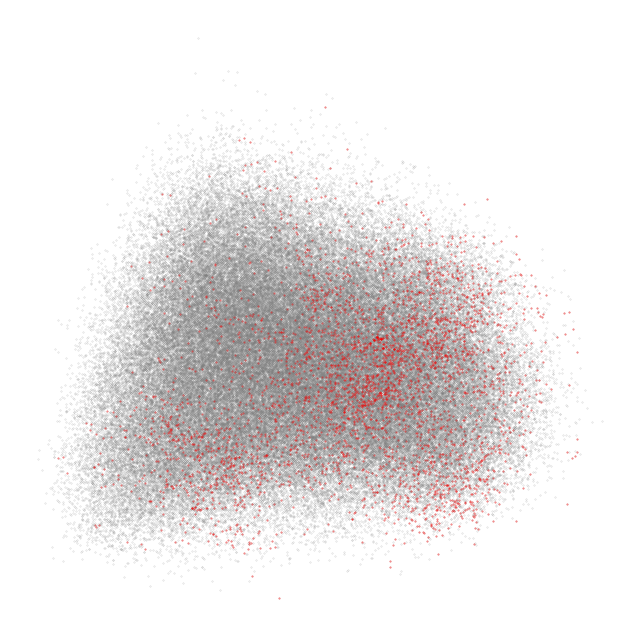

In [37]:
# All random moleucles in gray and GS/LF molecules as red
plt.figure(figsize=(8, 8))
ax = plt.gca()
z1.plot.scatter(x=0, y=1, c='grey', alpha=0.5, s=0.05, ax=ax)
z1.loc[gslf_index].plot.scatter(
    x=0, y=1, c='red', alpha=0.5, s=0.2, ax=ax)
ax.set_axis_off()

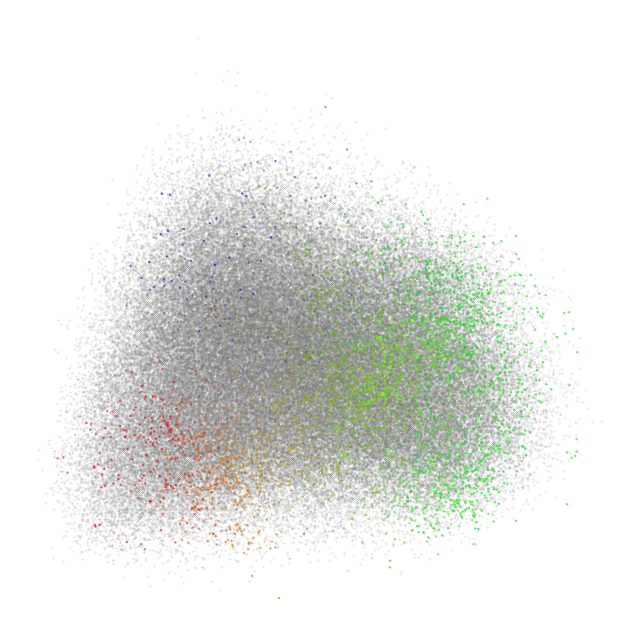

In [39]:
# All random molecules as gray and GS/LF molecules in original NMF label factor colors
plt.figure(figsize=(8, 8))
ax = plt.gca()
z1.plot.scatter(x=0, y=1, c='grey', alpha=0.5, s=0.05, ax=ax)
z1.loc[gslf_index].plot.scatter(
    x=0, y=1, c=z2.loc[gslf_index].values, alpha=0.5, s=0.5, ax=ax)
ax.set_axis_off()